# Challenge: What test to use

Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
Did people become happier from 2012 to 2014? Compute results for each country in the sample.
Who reported watching more TV in 2012, men or women?
Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
# Necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Load in data
ess_raw = pd.read_csv('ESSdata_Thinkful.csv')
ess_raw.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
ess_raw.nunique()

cntry         6
idno       3086
year          2
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
sclmeet       7
sclact        5
gndr          2
agea         83
partner       2
dtype: int64

					Distribution of trust


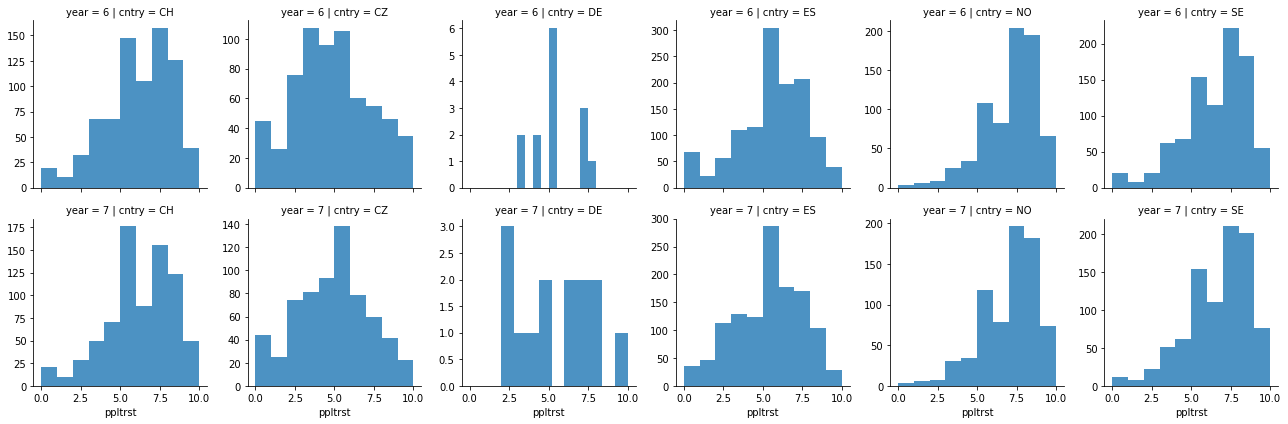

Shapiro Tests for Normality
CH 6 (0.9517108201980591, 9.511383786695374e-15)
CH 7 (0.9547930955886841, 2.4654701498145852e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715777039527893, 1.8779569010973773e-09)

DE 6 (0.8929170966148376, 0.1069343090057373)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292042255401611, 7.92943027973029e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



In [4]:
#Did people become less trusting from 2012 to 2014?

# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(ess_raw, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
print('\t\t\t\t\tDistribution of trust')
plt.show()

# Testing each country and each year to determine if trust is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_raw.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].ppltrst))
    print()

In [5]:
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].ppltrst, 
                        y=ess_temp[ess_temp.year == 7].ppltrst))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

CZ WilcoxonResult(statistic=82837.0, pvalue=0.2931891426327379)

DE WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

ES WilcoxonResult(statistic=243475.5, pvalue=0.005570829650439684)

NO WilcoxonResult(statistic=85392.0, pvalue=0.6139175669970661)

SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)



D:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2391: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
D:\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2392: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


					Distribution of happiness


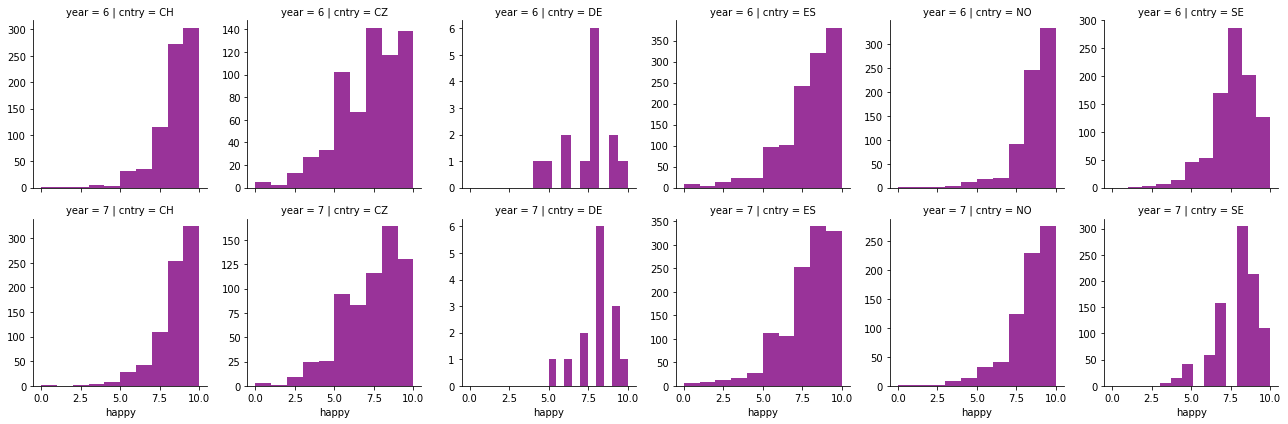

Shapiro Tests for Normality
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.944864809513092, 3.1645106863707403e-14)

DE 6 (0.9160984754562378, 0.22211012244224548)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898763644671094e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795286417007446, 4.680781911775775e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.9121034145355225, 5.600535793318595e-22)



In [6]:
# Did people become happier from 2012 to 2014? Compute results for each country in the sample. 
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_raw, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8, color='purple')
print('\t\t\t\t\tDistribution of happiness')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_raw.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt].dropna()
    for year in years:
        
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].happy))
    print()

In [7]:
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt]
    
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].happy, y=ess_temp[ess_temp.year == 7].happy))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=92816.5, pvalue=0.8208688161425343)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.04923868084306013)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.5136403441005022)



		Distribution of total TV Watching in 2012 for men and women


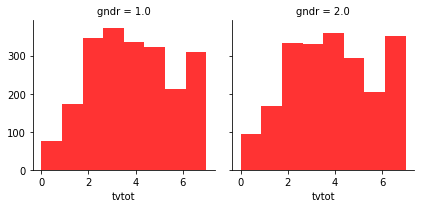

Males (1.0): (0.9434293508529663, 5.994494507539187e-28)
Females (2.0): (0.9390434622764587, 8.488309331265169e-29)


In [8]:
# Who reported watching more TV in 2012, men or women?
ess_2012 = ess_raw[ess_raw.year == 6]
g = sns.FacetGrid(ess_2012, col='gndr', dropna=True, sharey=True)
g = g.map(plt.hist, 'tvtot', alpha=0.8, color='red', bins=8)

print('\t\tDistribution of total TV Watching in 2012 for men and women')
plt.show()

print('Males (1.0):', shapiro(ess_2012[ess_2012.gndr ==1].tvtot.dropna()))
print('Females (2.0):', shapiro(ess_2012[ess_2012.gndr ==2].tvtot.dropna()))


In [9]:
ess_2012[ess_2012.gndr == 1].tvtot.dropna().count()

2151

In [10]:
ess_2012[ess_2012.gndr == 2].tvtot.dropna().count()

2140

In [11]:
# Printing Wilcoxon Test for TV watching across genders
print('Wilcoxon Test:', wilcoxon(ess_2012[ess_2012.gndr == 1].tvtot.dropna()[:2140], 
                                 y=ess_2012[ess_2012.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=782530.0, pvalue=0.5033507782372963)


		Distribution of Fairness in 2012 for People who Live with and without a Partner


D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
D:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


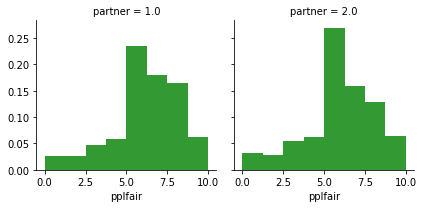

Lives with Partner (1.0): (0.94523686170578, 2.068099309311279e-30)
Lives Alone (2.0): (0.9332860112190247, 2.8956791203657545e-26)


In [12]:
#Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
g = sns.FacetGrid(ess_2012, col='partner', dropna=True, sharey=True)
g = g.map(plt.hist, 'pplfair', alpha=0.8, color='green', bins=8, normed=True)

print('\t\tDistribution of Fairness in 2012 for People who Live with and without a Partner')
plt.show()

print('Lives with Partner (1.0):', shapiro(ess_2012[ess_2012.partner ==1].tvtot.dropna()))
print('Lives Alone (2.0):', shapiro(ess_2012[ess_2012.partner ==2].tvtot.dropna()))

In [13]:
ess_2012[ess_2012.partner == 1].pplfair.dropna().count()

2663

In [14]:
ess_2012[ess_2012.partner == 2].pplfair.dropna().count()

1608

In [15]:
# Printing Wilcoxon Test for fairness across living with and without partners.  
# Using only first 1608 entries of living with partners to even counts.
print('Wilcoxon Test:', wilcoxon(ess_2012[ess_2012.partner == 1].pplfair.dropna()[:1608], 
                                 y=ess_2012[ess_2012.partner == 2].pplfair.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=426739.0, pvalue=0.004340158276254172)


In [16]:
print('Median Fairness for People living with Partners:', ess_2012[ess_2012.partner == 1].pplfair.median())
print('Median Fairness for People living Alone:', ess_2012[ess_2012.partner == 2].pplfair.median())

Median Fairness for People living with Partners: 7.0
Median Fairness for People living Alone: 6.0


In [17]:
#Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out? P
# Pulling out the countries in 2014
country_list = ['CH','CZ','NO','SE']
ess_c = ess_raw[(ess_raw.cntry.isin(country_list)) & (ess_raw.year == 7)]

		Distribution of Social Meetings from 2014 for Four European Countries


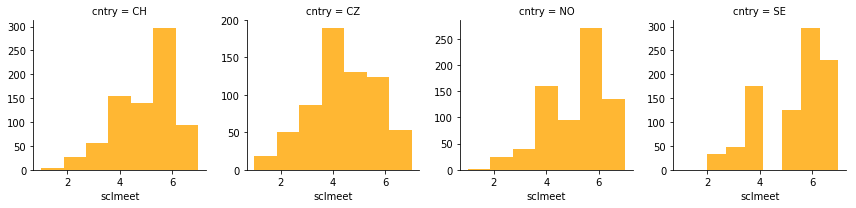

Shapiro Tests for Normality
CH (0.8974164724349976, 2.7436334896806913e-22)

CZ (0.9451602101325989, 7.663770300607355e-15)

NO (0.8881818056106567, 1.422473605641294e-22)

SE (0.8798282146453857, 6.682967662559975e-26)



In [18]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclmeet', alpha=0.8, color='orange', bins=7)

print('\t\tDistribution of Social Meetings from 2014 for Four European Countries')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    print(cnt, shapiro(ess_c[ess_c.cntry ==cnt].sclmeet.dropna()))
    # Printing Shapiro test results
    print()

In [19]:
# Printing Kruskal test statistic
print(kruskal(ess_c[ess_c.cntry == 'CH'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))

KruskalResult(statistic=195.46697597845895, pvalue=4.023159532969878e-42)


In [20]:
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs NO:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna()))
print('CZ vs SE:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna()))
print('ES vs SE:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))
print('NO vs SE:', ttest_ind(ess_c[ess_c.cntry == 'NO'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))

CZ vs ES: Ttest_indResult(statistic=nan, pvalue=nan)
CZ vs NO: Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
CZ vs SE: Ttest_indResult(statistic=-13.471687937687198, pvalue=3.252593934148172e-39)
ES vs NO: Ttest_indResult(statistic=nan, pvalue=nan)
ES vs SE: Ttest_indResult(statistic=nan, pvalue=nan)
NO vs SE: Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.06734412432597783)


		Distribution of Social Activities from 2014 for Four European Countries


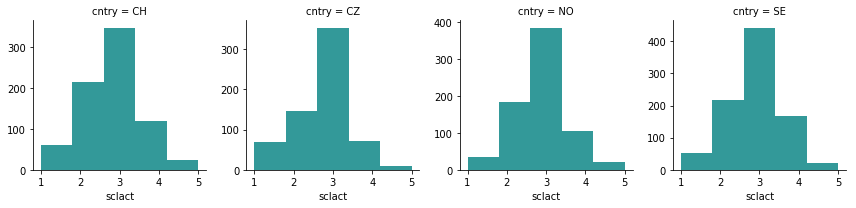

Shapiro Tests for Normality
CH (0.8931546211242676, 1.308755961383447e-22)

CZ (0.8517600893974304, 3.2631608025549396e-24)

NO (0.8678725957870483, 2.398206966061988e-24)

SE (0.8822488784790039, 1.283228571387991e-25)



In [21]:
#Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclact', alpha=0.8, color='teal', bins=5)
print('\t\tDistribution of Social Activities from 2014 for Four European Countries')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Printing Shapiro test results
    print(cnt, shapiro(ess_c[ess_c.cntry ==cnt].sclact.dropna()))
    print()

In [22]:
# Printing Kruskal test statistic
print(kruskal(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))

KruskalResult(statistic=nan, pvalue=nan)


In [23]:
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))
print('ES vs NO:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))
print('NO vs SE:', ttest_ind(ess_c[ess_c.cntry == 'NO'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))

CZ vs ES: Ttest_indResult(statistic=nan, pvalue=nan)
CZ vs NO: Ttest_indResult(statistic=-3.44673561169421, pvalue=0.0005844634540645623)
CZ vs SE: Ttest_indResult(statistic=-4.0018841917465595, pvalue=6.580214302799725e-05)
ES vs NO: Ttest_indResult(statistic=nan, pvalue=nan)
ES vs SE: Ttest_indResult(statistic=nan, pvalue=nan)
NO vs SE: Ttest_indResult(statistic=-0.4823216270234106, pvalue=0.6296421272017451)


In [27]:
CH_act = ess_raw['sclact'][(ess_raw['cntry'] == 'ES') & (ess_raw['year'] == 7)].dropna()
NO_act = ess_raw['sclact'][(ess_raw['cntry'] == 'NO') & (ess_raw['year'] == 7)].dropna()
SE_act = ess_raw['sclact'][(ess_raw['cntry'] == 'SE') & (ess_raw['year'] == 7)].dropna()
CZ_act = ess_raw['sclact'][(ess_raw['cntry'] == 'CZ') & (ess_raw['year'] == 7)].dropna()

In [28]:
print('Mean social activities for Switzerland:', CH_act.mean())
print('Mean social activities for Czech Republic:', CZ_act.mean())
print('Mean social activities for Norway:', NO_act.mean())
print('Mean social activities for Sweden:', SE_act.mean())

Mean social activities for Switzerland: 2.6168776371308016
Mean social activities for Czech Republic: 2.703076923076923
Mean social activities for Norway: 2.859097127222982
Mean social activities for Sweden: 2.879424778761062
